In [1]:
import os
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.manifold import TSNE
unary_or_rel='unary' 
result_dir='C:/Users/56-000M100-32/Arthur/ct-base/result_4_3d/'
pcs_dir='C:/Users/56-000M100-32/Arthur/ct-base/1027/'+unary_or_rel+'_feat/'
save_dir='C:/Users/56-000M100-32/Arthur/ct-base/1027/'+unary_or_rel+'_feat/stne_plot/'
truth_dir='C:/Users/56-000M100-32/Arthur/ct-base/ct_dataset/1007dataset_clearnone/label_xyz/'
subjects=os.listdir(result_dir)

In [2]:
def plot_embedding(data, label, title, classes=10):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
 
    fig = plt.figure(figsize=(15,15))
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / classes),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [3]:
def generate_group(seg):
    
    full_group=np.unique(seg)
    #full_group=full_group.tolist()
    full_group2point=seg
   
    group_to_point_full={}
    
    for j in range(len(full_group2point)):
        if full_group2point[j] not in group_to_point_full:
            group_to_point_full[full_group2point[j]]=[]
        group_to_point_full[full_group2point[j]].append(j)
    #print(group_to_point_full)
    groups_full=list(set(full_group)&set(group_to_point_full.keys()))
    print(len(groups_full))
    print(len(group_to_point_full))
    idxs=np.array(group_to_point_full[int(groups_full[0])])
    
    print(int(groups_full[0]))
    print(idxs)
    return groups_full

In [4]:
class_feat=[]
class_label=[]
mapping=[]
for j in range(10):
    class_feat.append([])
    class_label.append([])
    mapping.append([])

In [49]:
all_label={}
for j,sub in enumerate(subjects[:-1]):
    print(sub)
    load_path=result_dir+sub
    r=open(load_path,'r')
    label=np.genfromtxt(r,delimiter=",",usemask=True)
    empty=np.ones(label.shape,dtype=np.int32)*-100
    all_label[sub[:-8]]=empty
    print(label.shape)
    r.close()
    
    pcs_path=pcs_dir+sub[:-4]+'.npy'
    #print(pcs_path)
    array=np.load(pcs_path)
    #array=array[:,4]
    print(array.shape)
    
    
    for i,feat in enumerate(array):
        
        if i%1000==0:
            #print(int(label[i]))
            class_feat[int(label[i])].append(feat)
            #class_label[label[i]].append(label[i])
            mapping[int(label[i])].append([sub[:-8],i])
        

    


0825_sz128_dist25_thd400_Pat10nBlock.pth.txt
(87542,)
(87542, 32)
0825_sz128_dist25_thd400_Pat1Block.pth.txt
(69485,)
(69485, 32)
0825_sz128_dist25_thd400_Pat2Block.pth.txt
(60026,)
(60026, 32)
0825_sz128_dist25_thd400_Pat3Block.pth.txt
(85654,)
(85654, 32)
0825_sz128_dist25_thd400_Pat4Block.pth.txt
(58514,)
(58514, 32)
0825_sz128_dist25_thd400_Pat5Block.pth.txt
(59887,)
(59887, 32)
0825_sz128_dist25_thd400_Pat6Block.pth.txt
(91113,)
(91113, 32)
0825_sz128_dist25_thd400_Pat7Block.pth.txt
(101302,)
(101302, 32)
0825_sz128_dist25_thd400_Pat8Block.pth.txt
(75899,)
(75899, 32)
0825_sz128_dist25_thd400_Pat9nBlock.pth.txt
(86795,)
(86795, 32)


In [50]:
for j in range(10):
    print(len(class_feat[j]))
    print((mapping[j][0][0]))

210
0825_sz128_dist25_thd400_Pat10nBlock
260
0825_sz128_dist25_thd400_Pat10nBlock
90
0825_sz128_dist25_thd400_Pat10nBlock
125
0825_sz128_dist25_thd400_Pat10nBlock
590
0825_sz128_dist25_thd400_Pat10nBlock
540
0825_sz128_dist25_thd400_Pat10nBlock
705
0825_sz128_dist25_thd400_Pat10nBlock
285
0825_sz128_dist25_thd400_Pat10nBlock
695
0825_sz128_dist25_thd400_Pat10nBlock
405
0825_sz128_dist25_thd400_Pat10nBlock


In [51]:
#np.array(distances).mean()+np.array(distances).std():(255, 6167)
#OPTIC:(527, 3342)

In [52]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors


In [53]:
def k_means_clustering(class_result,n_clusters,class_num):
    k_means=KMeans(n_clusters=n_clusters,random_state=42)
    k_means.fit(class_result)
    fig = plot_embedding(class_result, k_means.labels_,'k_means clustering of class (%s)' % class_num,len(c))
    plt.show(fig)
    
    

In [54]:
def DBSCAN_default(class_result):
    dbscan=DBSCAN()
    dbscan.fit(class_result)
    fig = plot_embedding(class_result, dbscan.labels_,'DBSCAN clustering of class (%s)' % class_num,len(c))
    plt.show(fig)

In [55]:
def observe_and_decide_epsilon(class_result):
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(class_result)
    distances, indices = nbrs.kneighbors(class_result)
    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    print(np.array(distances).mean(),np.array(distances).std(),np.percentile(distances, 90))
    #'''
    plt.figure(figsize=(20,10))
    plt.plot(distances)
    plt.title('K-distance Graph',fontsize=20)
    plt.xlabel('Data Points sorted by distance',fontsize=14)
    plt.ylabel('Epsilon',fontsize=14)
    plt.show()
    #'''
    return np.array(distances).mean()+np.array(distances).std()

In [59]:
def DBSCAN_opt(class_result,epsilon,class_num):
    dbscan_opt=DBSCAN(eps=epsilon,min_samples=5)
    dbscan_opt.fit(class_result)

    from collections import Counter
    c=Counter(dbscan_opt.labels_)


    #fig = plot_embedding(class_result, dbscan_opt.labels_,'DBSCAN_opt clustering of class (%s)' % class_num,len(c))



    #plt.show(fig)

    return len(c),c[-1],dbscan_opt.labels_

In [60]:
def OPTIC_clustering(class_result,class_num):
    optic=OPTICS()
    optic.fit(class_result)

    from collections import Counter
    c=Counter(optic.labels_)


    #fig = plot_embedding(class_result, optic.labels_,'OPTIC clustering of class (%s)' % (class_num),len(c))



    #plt.show(fig)

    return len(c),c[-1],optic.labels_

In [64]:
cluster_ttl=0
noise_ttl=0
class_psuedo=[]

for j in range(10):
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    #result = tsne.fit_transform(class_feat[j])
    
    
    #n=np.ones(len(result),dtype=np.int32)*j
    
    #print(len(result))
    
    #fig = plot_embedding(result, n,'t-SNE embedding of all subjects class (%s)' % (j))
    #save_path=save_dir+'all'+str(j)+'_'+unary_or_rel+'.png'
    #plt.savefig(save_path, dpi=300, bbox_inches='tight')
    #plt.show(fig)
    epsilon=observe_and_decide_epsilon(class_feat[j])
    #print(epsilon)
    cluster_num,noise_num,psuedo=DBSCAN_opt(class_feat[j],j)
    #cluster_num,noise_num,psuedo=OPTIC_clustering(class_feat[j],j)
    if noise_num>0:
        cluster_ttl=cluster_ttl+cluster_num-1
    else:
        cluster_ttl=cluster_ttl+cluster_num
    noise_ttl=noise_ttl+noise_num
    class_psuedo.append(psuedo)
cluster_ttl,noise_ttl

TypeError: DBSCAN_opt() missing 1 required positional argument: 'class_num'

In [45]:
cumulated_classes=0    
for j in range(10):
    for idx,psuedo in enumerate(class_psuedo[j]):
        #print(psuedo)
        if int(psuedo) == -1:
            all_label[mapping[j][idx][0]][mapping[j][idx][1]]=-1
        else:
            all_label[mapping[j][idx][0]][mapping[j][idx][1]]=int(cumulated_classes+psuedo)
    print(cumulated_classes,np.array(class_psuedo[j]).max())
    cumulated_classes=cumulated_classes+np.array(class_psuedo[j]).max()+1

0 7
8 15
24 3
28 5
34 21
56 18
75 31
107 8
116 24
141 18


151
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat10nBlock.pth.npy
(87542, 32)


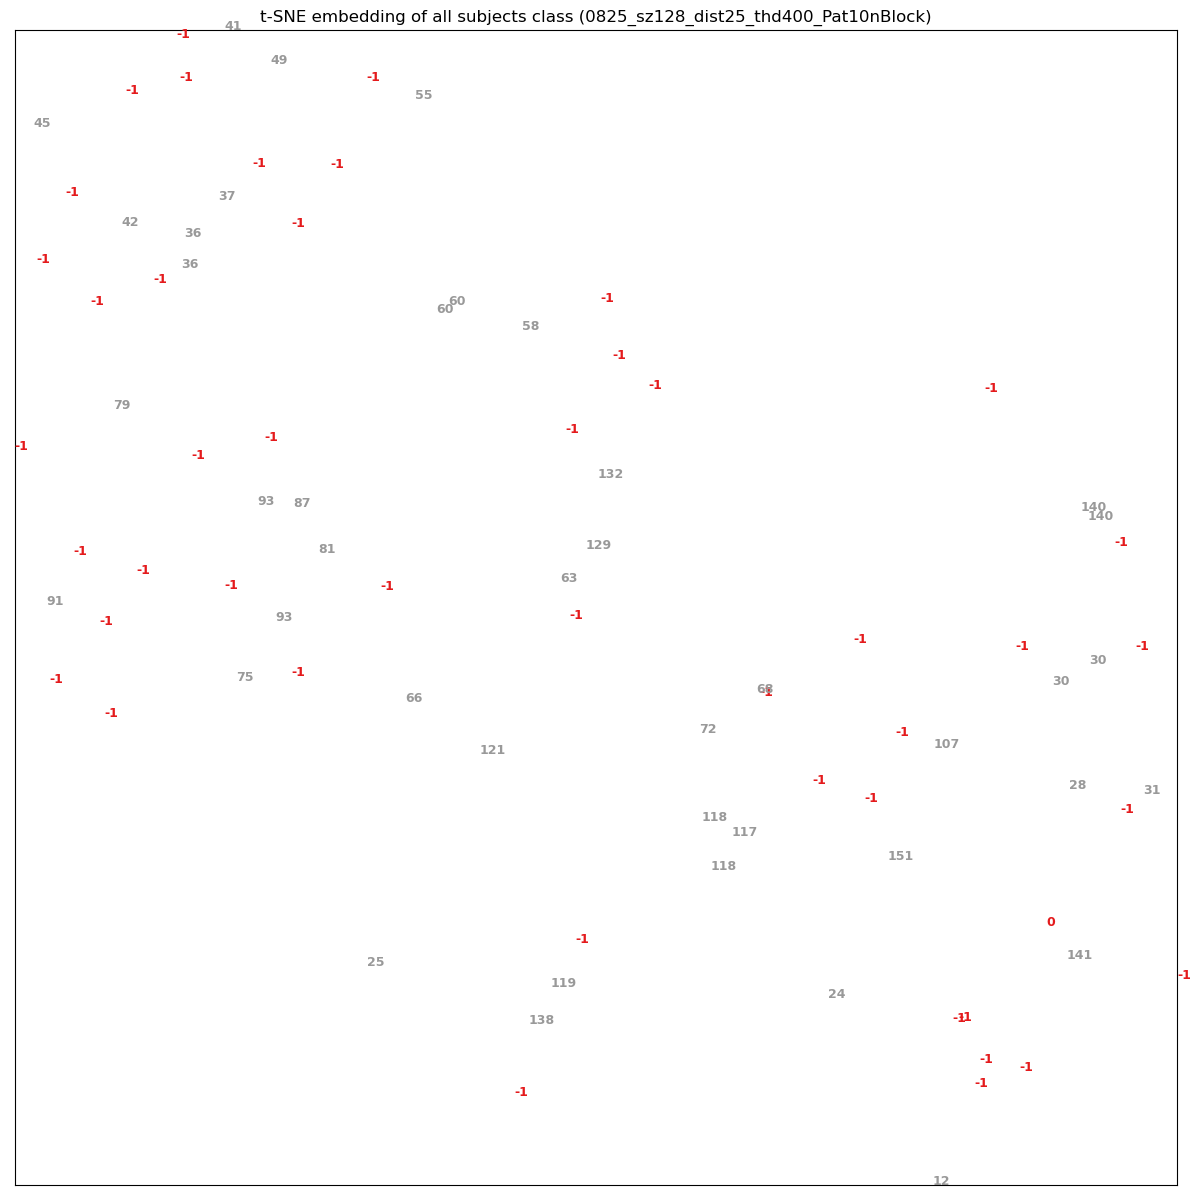

158
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat1Block.pth.npy
(69485, 32)


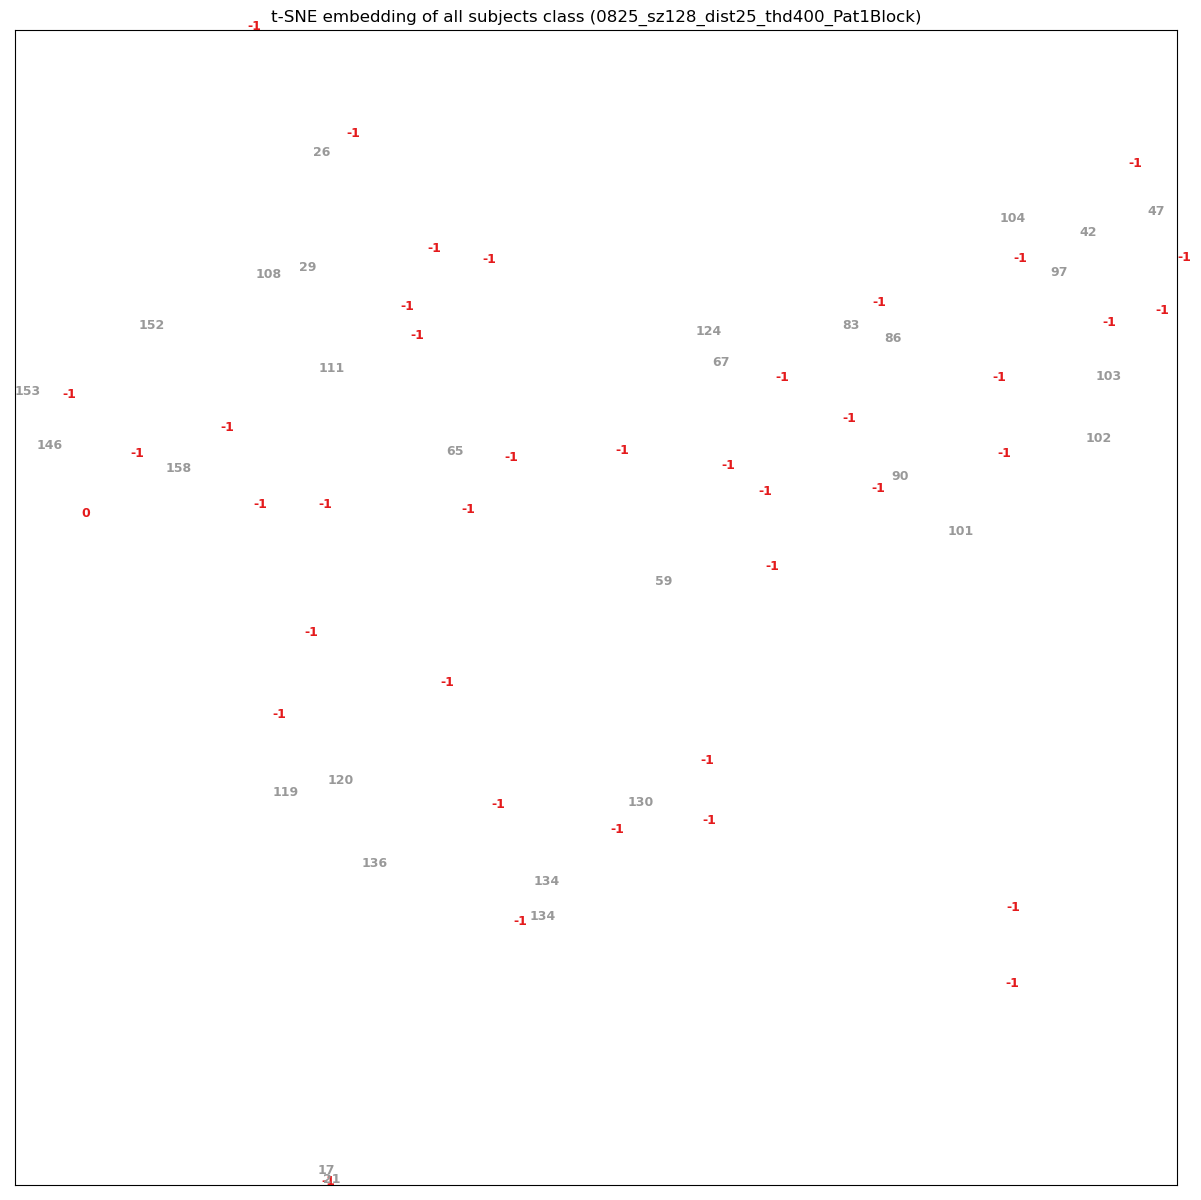

156
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat2Block.pth.npy
(60026, 32)


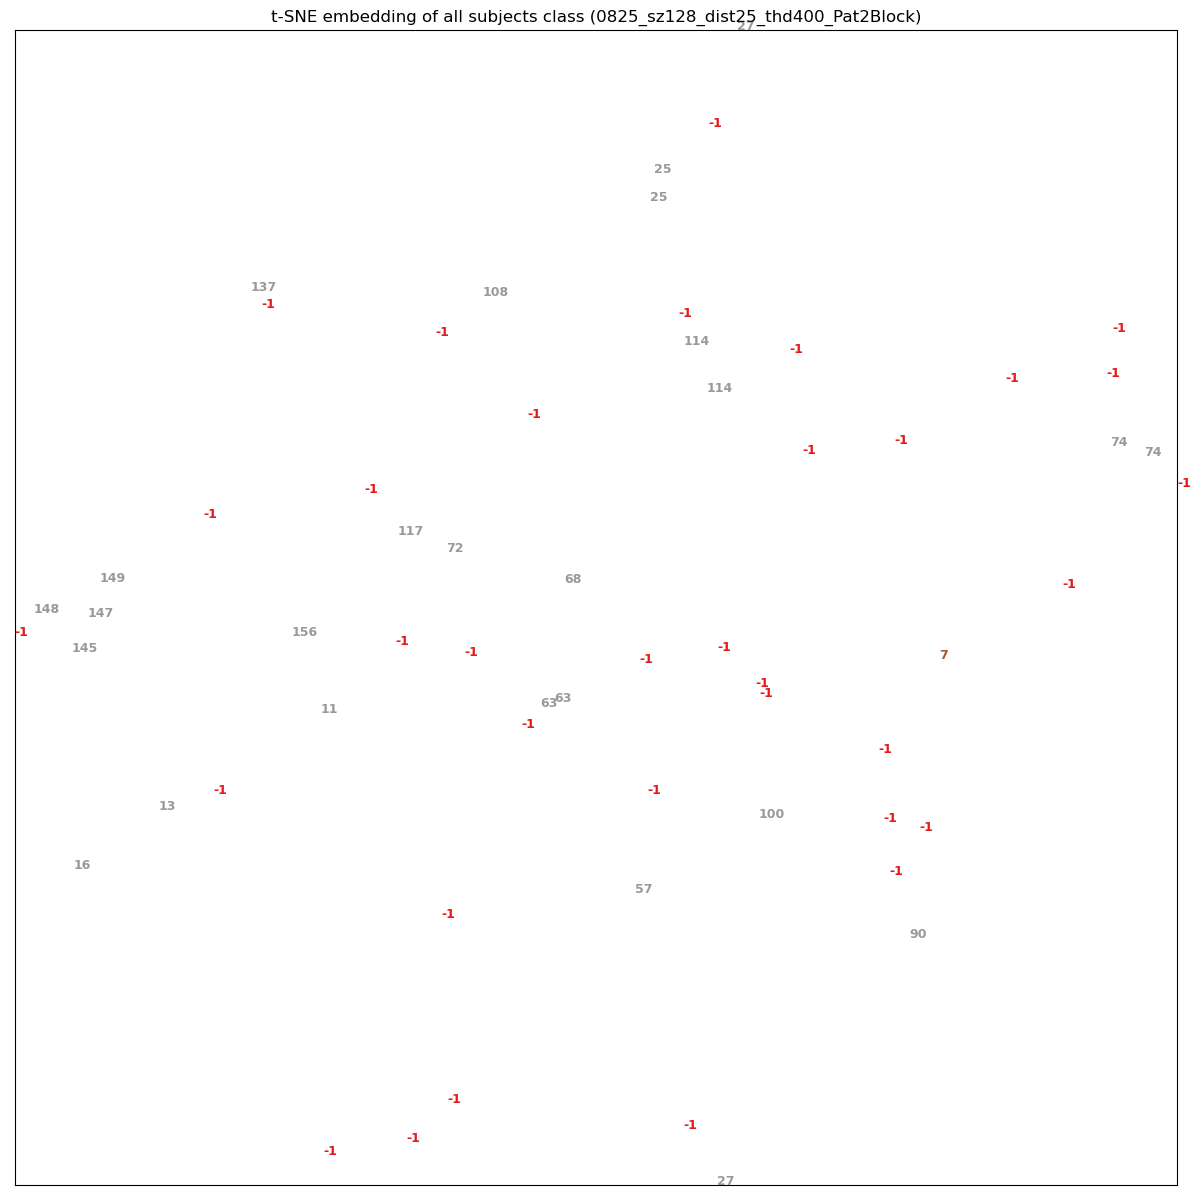

159
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat3Block.pth.npy
(85654, 32)


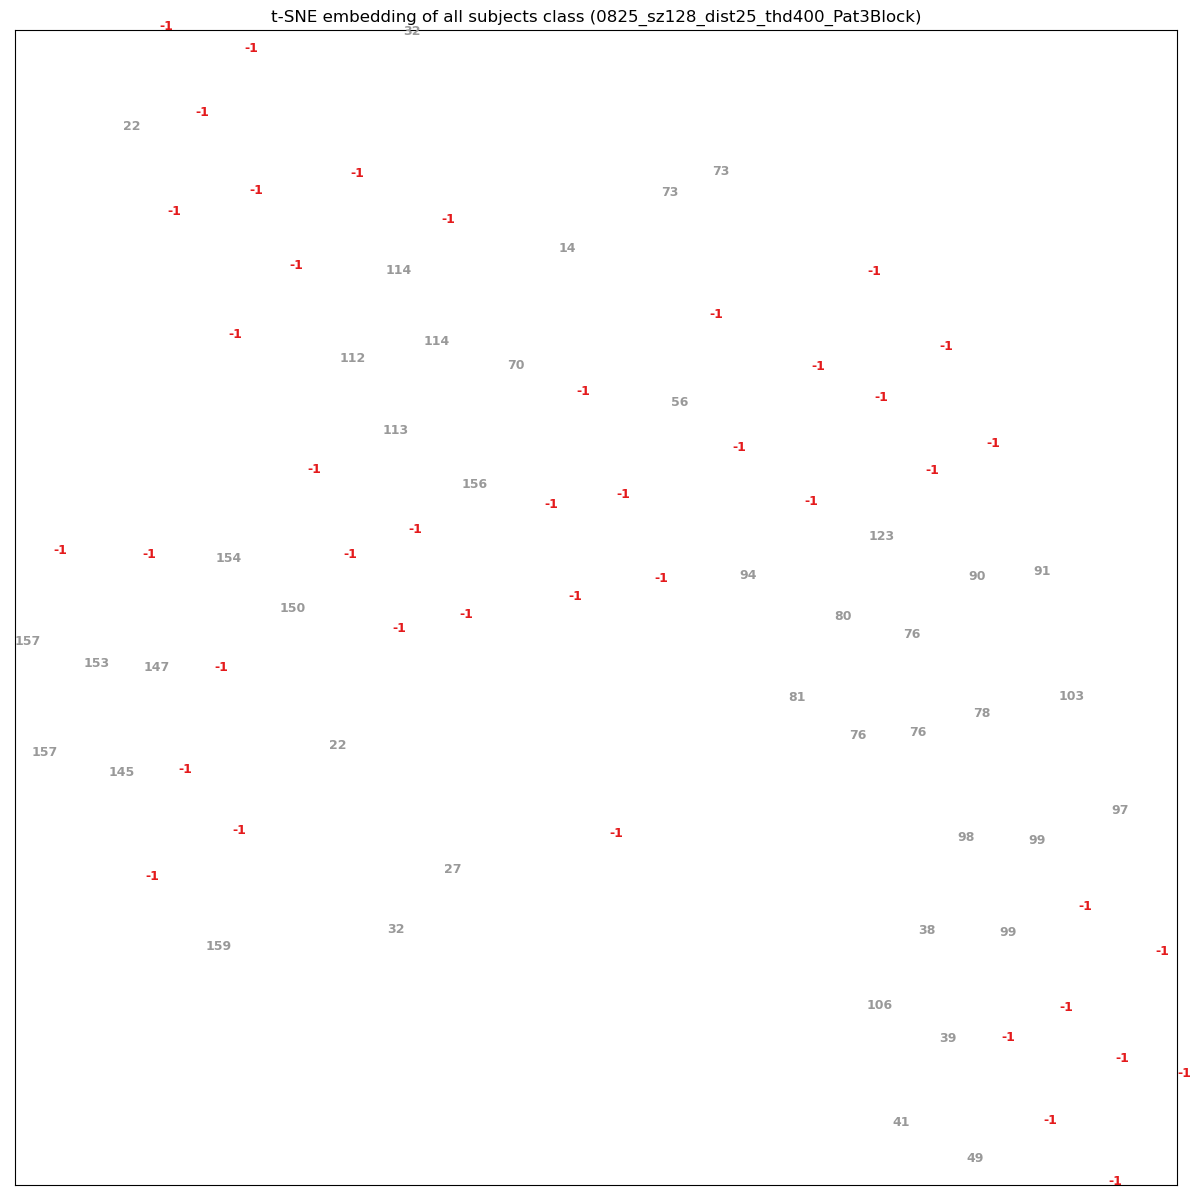

158
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat4Block.pth.npy
(58514, 32)


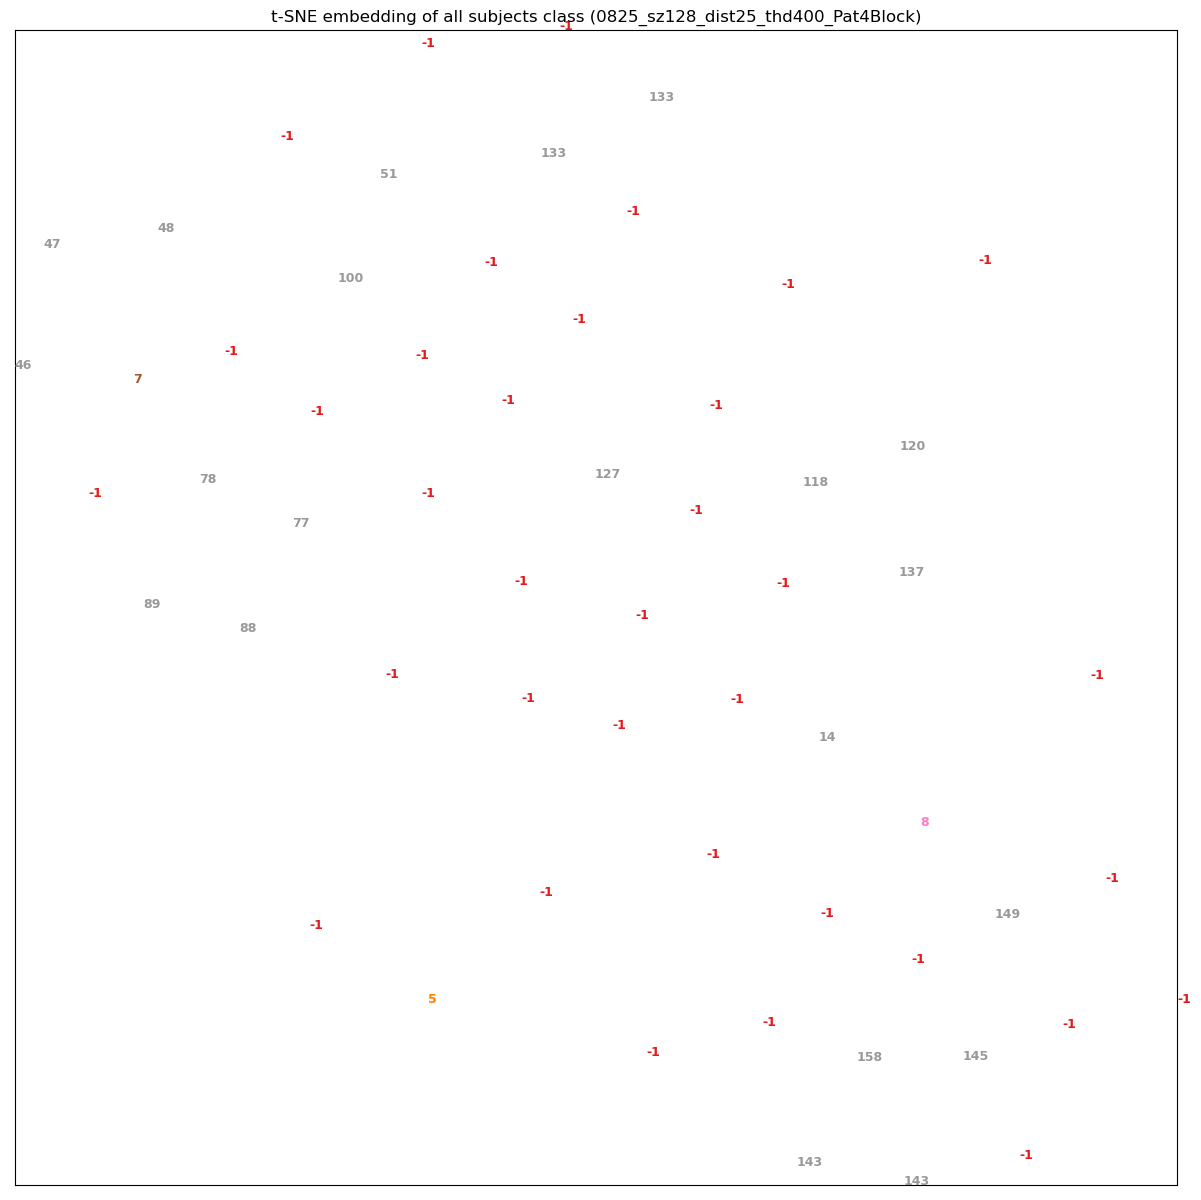

155
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat5Block.pth.npy
(59887, 32)


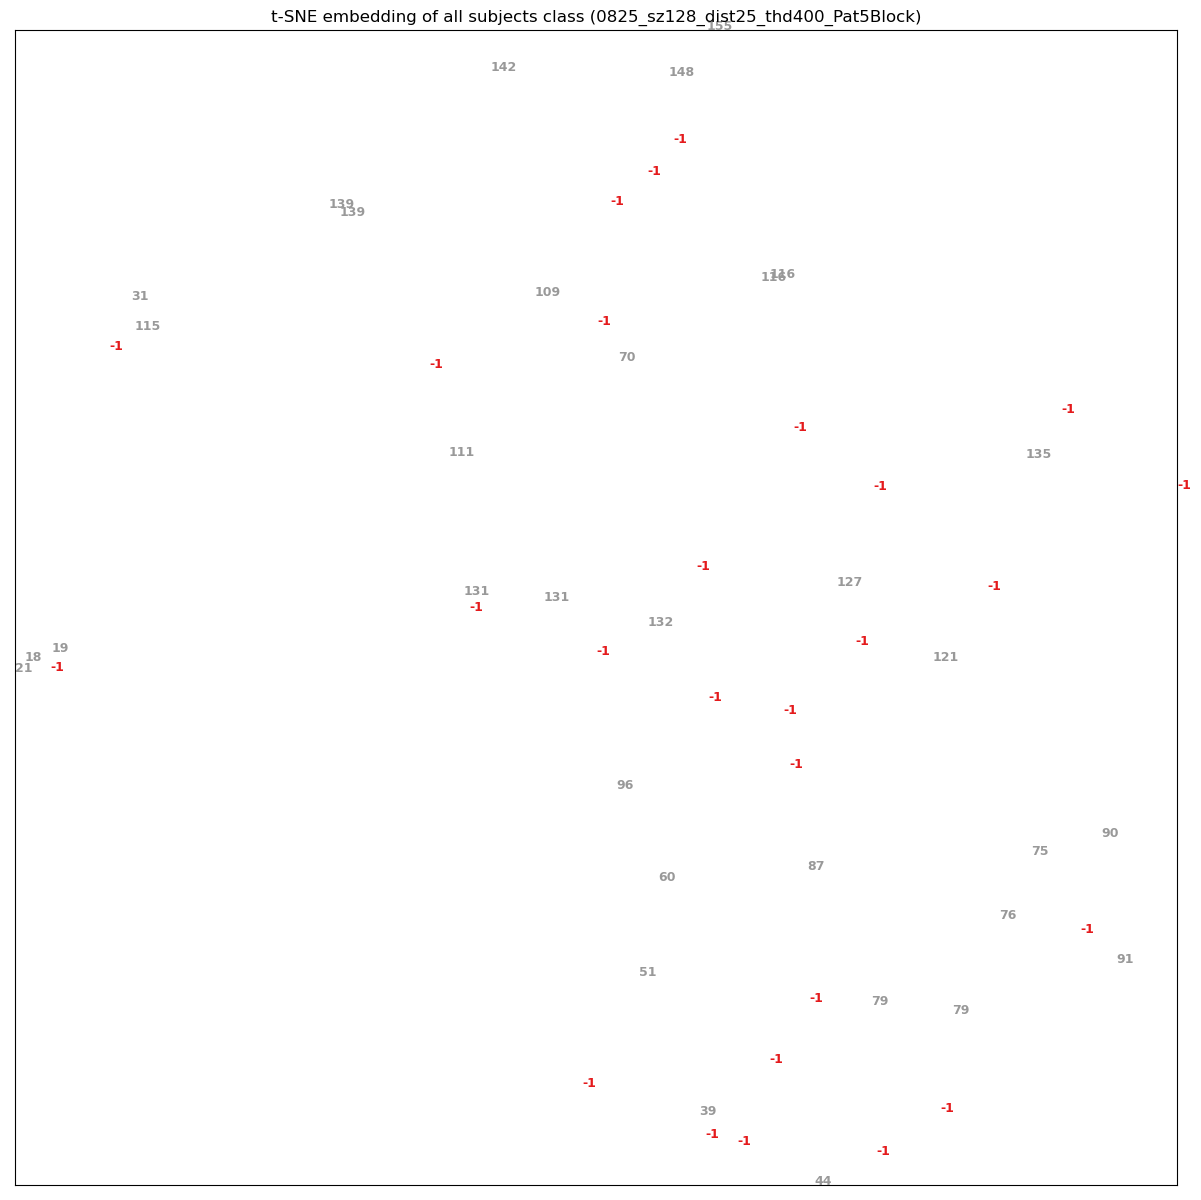

159
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat6Block.pth.npy
(91113, 32)


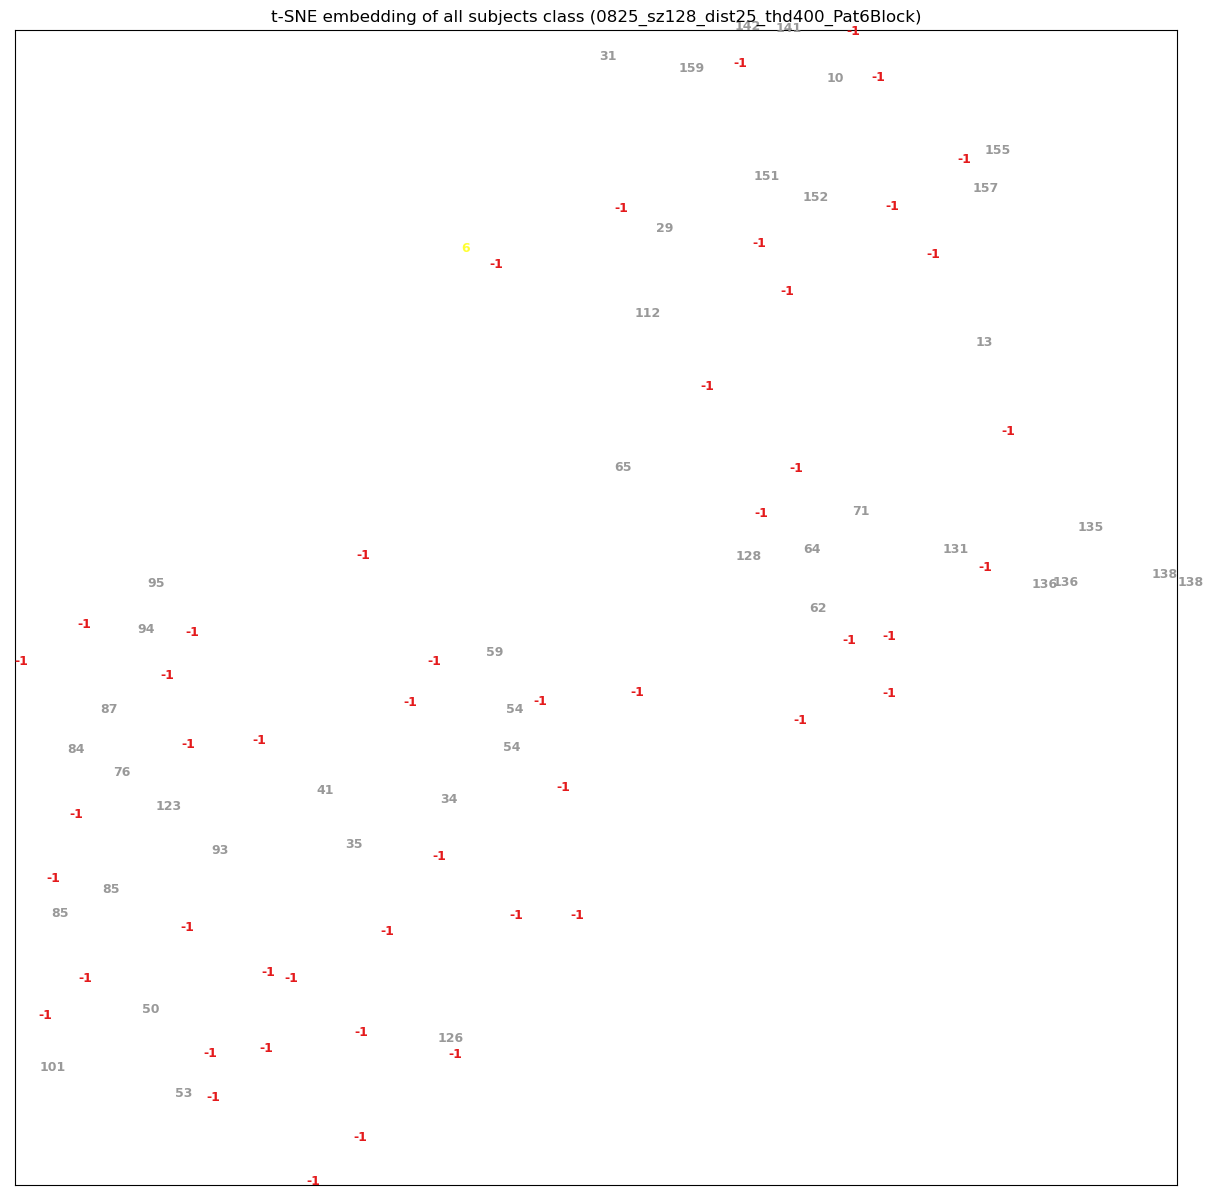

150
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat7Block.pth.npy
(101302, 32)


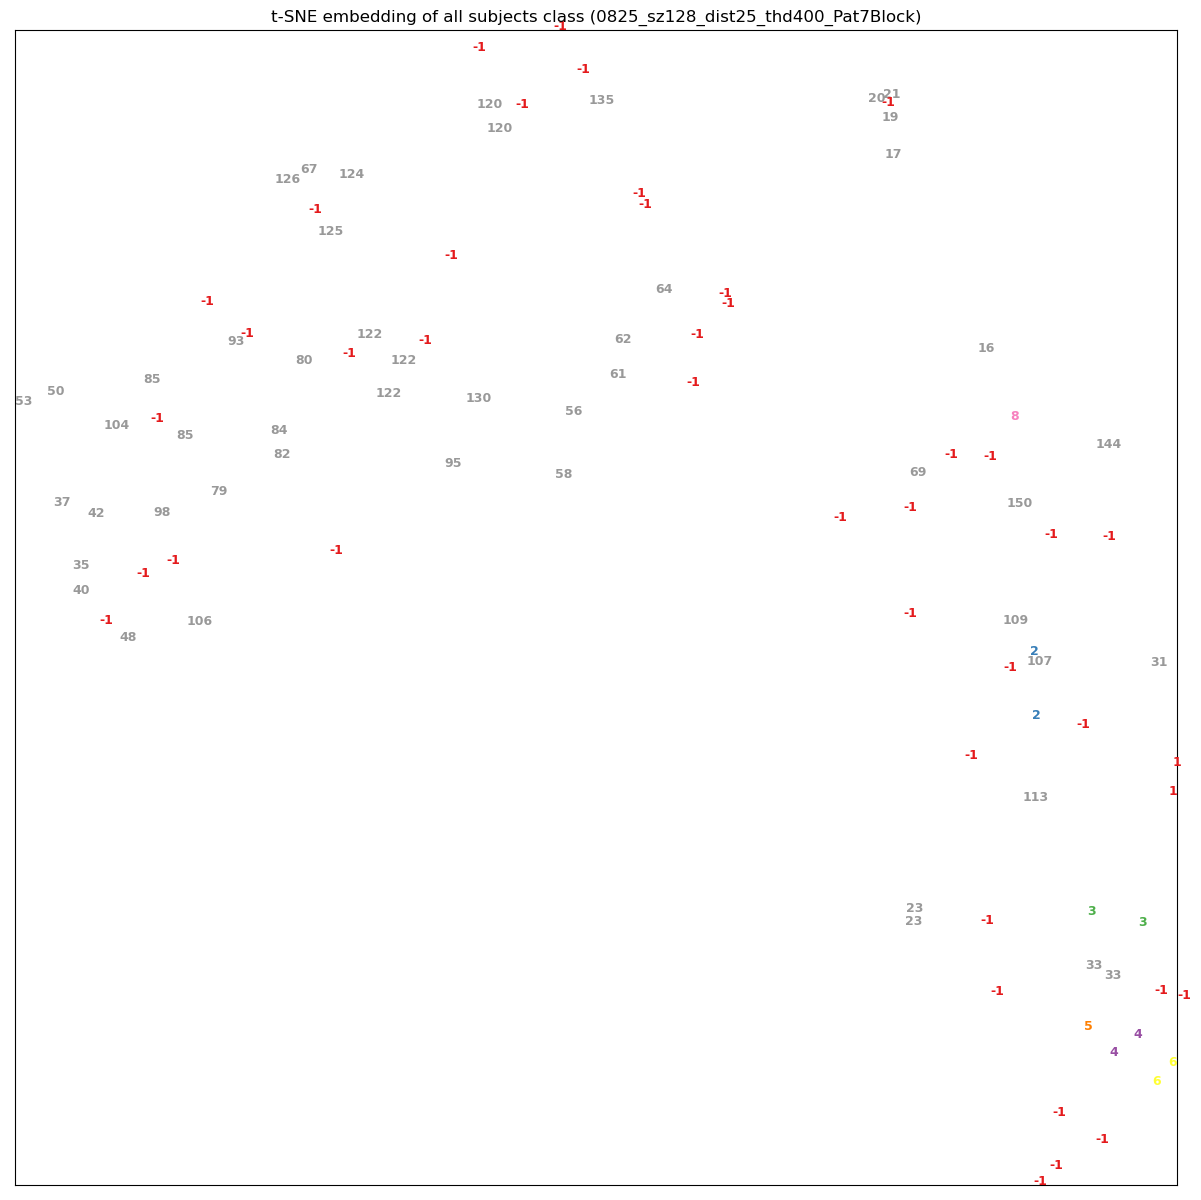

129
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat8Block.pth.npy
(75899, 32)


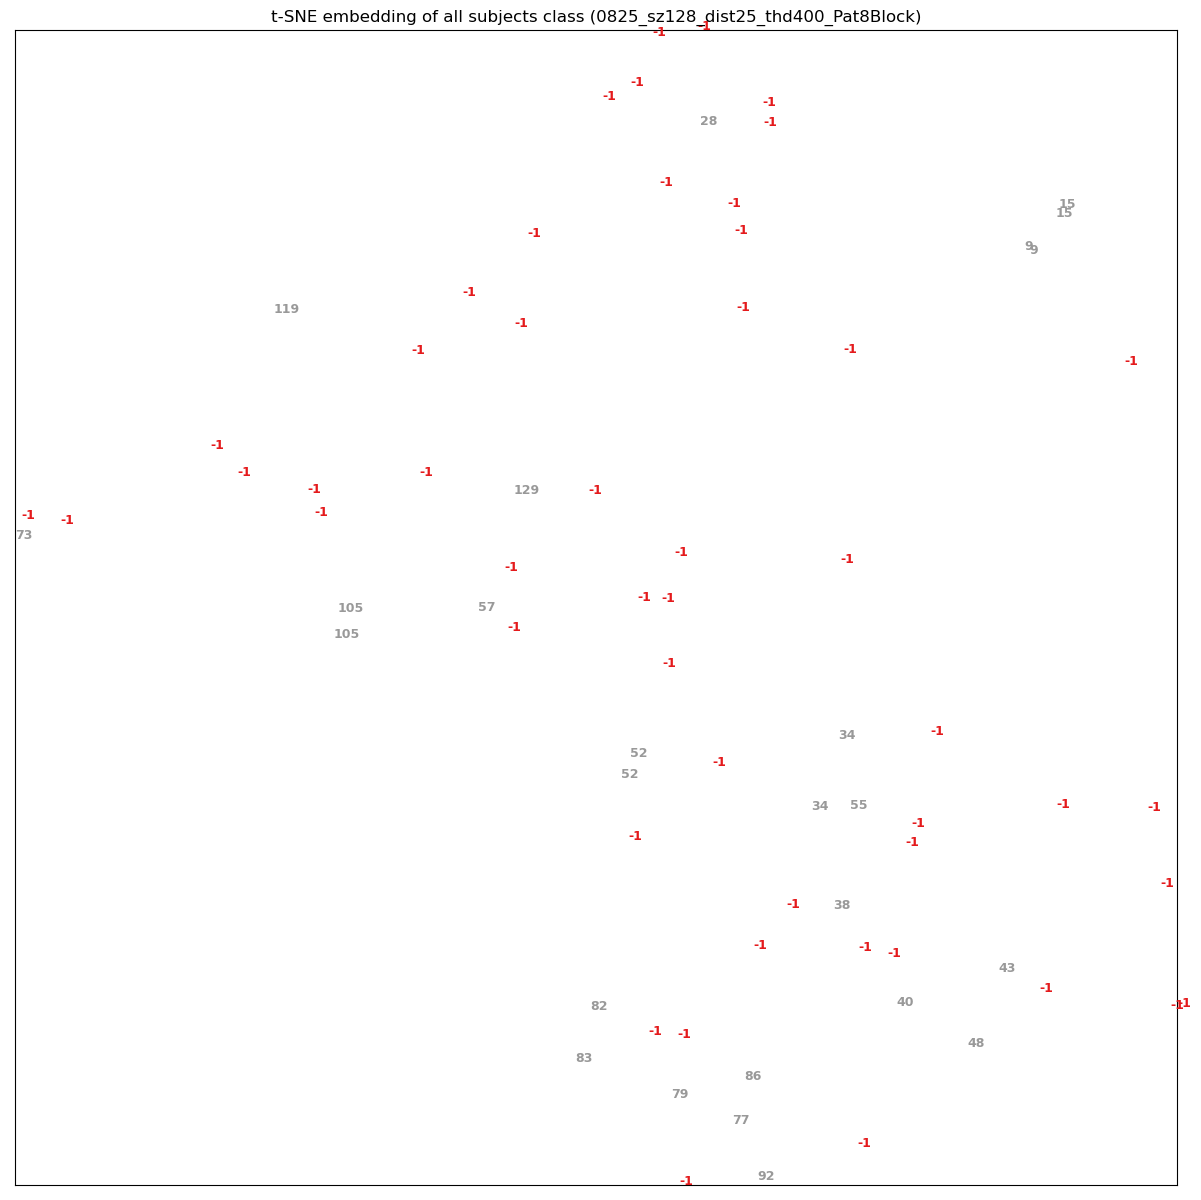

154
C:/Users/56-000M100-32/Arthur/ct-base/1027/unary_feat/0825_sz128_dist25_thd400_Pat9nBlock.pth.npy
(86795, 32)


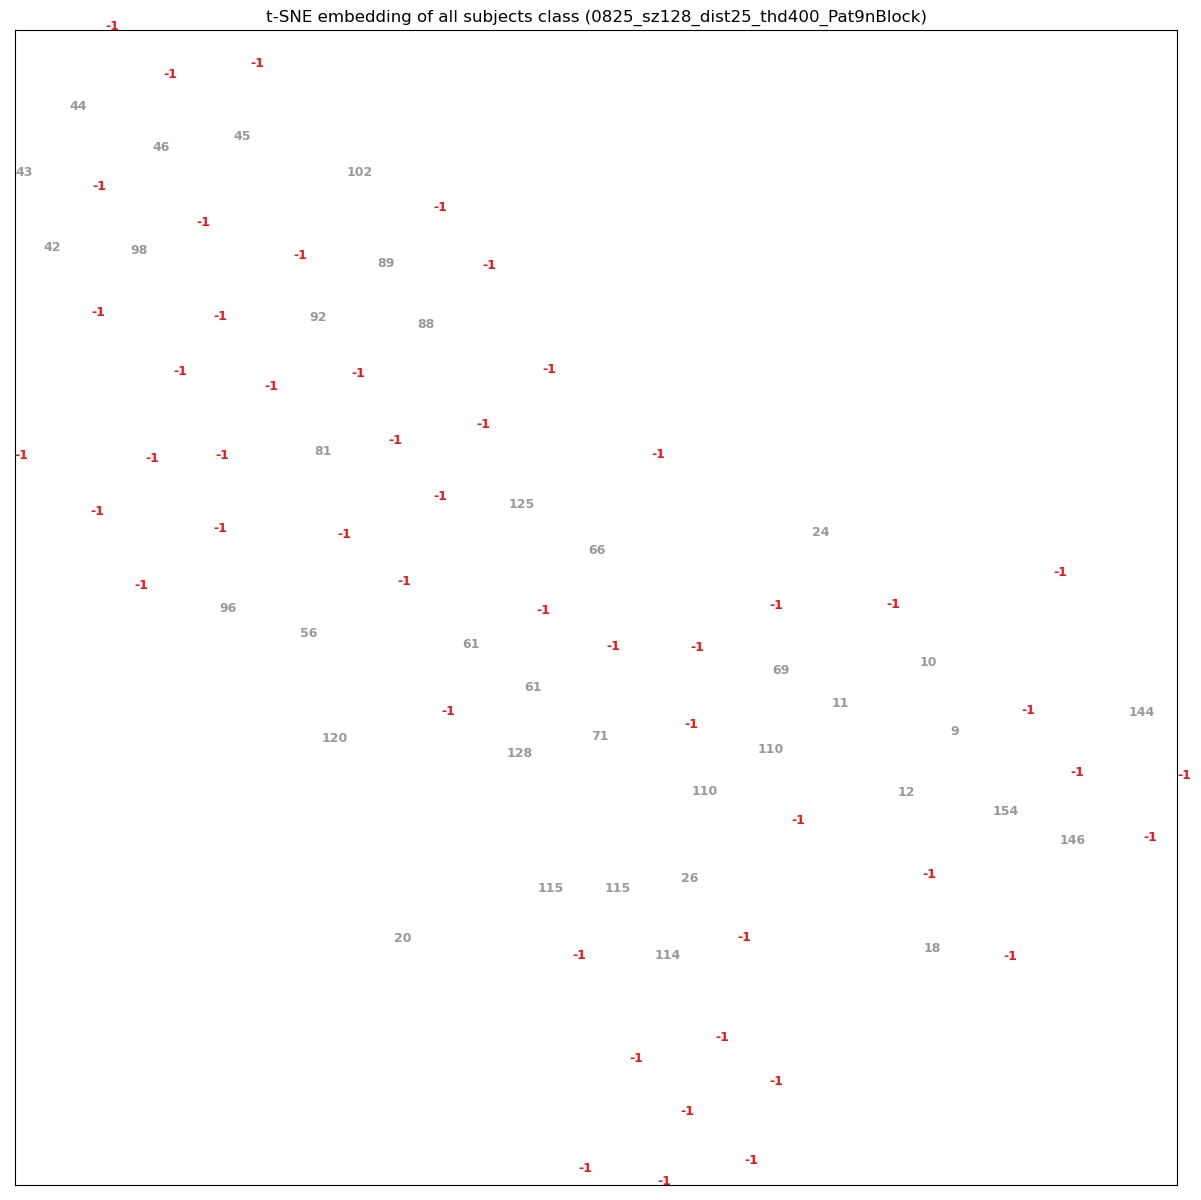

In [47]:
for j in all_label:
    a=np.array(all_label[j]).max()
    print(a)
    
    pcs_path=pcs_dir+j+'.pth.npy'
    print(pcs_path)
    array=np.load(pcs_path)
    #array=array[:,4]
    print(array.shape)
    f=[]
    l=[]
    for i,feat in enumerate(array):
        
        if i%1000==0:
            #print(int(label[i]))
            f.append(feat)
            l.append(all_label[j][i])
            
    
    
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    result = tsne.fit_transform(f)
    
    #print(len(result))
    
    fig = plot_embedding(result, l,'t-SNE embedding of all subjects class (%s)' % (j))
    plt.show(fig)

In [ ]:
2:(207, 1168)
np.array(distances).mean()+np.array(distances).std():(274, 1575)
np.array(distances).mean():(168, 6676)
OPTICS:(598, 2912)